In [129]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.style as style
import copy

In [130]:
def fix_state_name(state):
    for i in range(len(state)):
        if state[i] == '.':
            return state[:i].strip()
    return state

def get_net_data(df_list):    
    years = ["1994", "1996", "2004", "2008", "2012", "2014"]
    
    full_years = list(range(1994, 2014, 2))
    
    print(full_years)
    
    column_names = ["STATE", "FIRST_TIME_ENROLLMENT", 
                    "ENROLLED_IN_ANY", "ENROLLED_IN_HOME",
                    "RATIO_IN_STATE_TO_FIRST_TIME",
                    "RATIO_IN_STATE_TO_ANY_STATE", "MIGRATION_IN",
                    "MIGRATION_OUT", "MIGRATION_NET"]
    
    for df in df_list:
        del df["Unnamed: 4"]
        df.columns = column_names
        df.loc[:,"STATE"] = df.loc[:,"STATE"].apply(fix_state_name)
    
    state_names = list(df_list[0].STATE.unique())
    
    df_net_list = [df[["STATE","MIGRATION_NET"]] for df in df_list]

    df_net = pd.DataFrame(index=years, columns=state_names)

    for i in range(len(df_net_list)):
        for state in state_names:
            df_net.at[years[i], state] = float(df_net_list[i].loc[df_net_list[i]["STATE"] == state]["MIGRATION_NET"])

    df_net['Year'] = pd.to_numeric(df_net.index)
    df_net.index = list([i for i in range(len(years))])

    for state in state_names:
        df_net[state] = pd.to_numeric(df_net[state])

    cols = df_net.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_net = df_net[cols]
    
    return df_net

In [131]:
years = ["1994", "1996", "2004", "2008", "2012", "2014"]

df_list = [pd.read_csv("data/EducationData" + year + ".csv") for year in years]

df_funding = pd.read_csv("data/StateFunding2008-2016.csv")
df_net = get_net_data(df_list)

[1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012]


Text(1994,42600,'The net migration of first-year students while attending post-secondary education.')

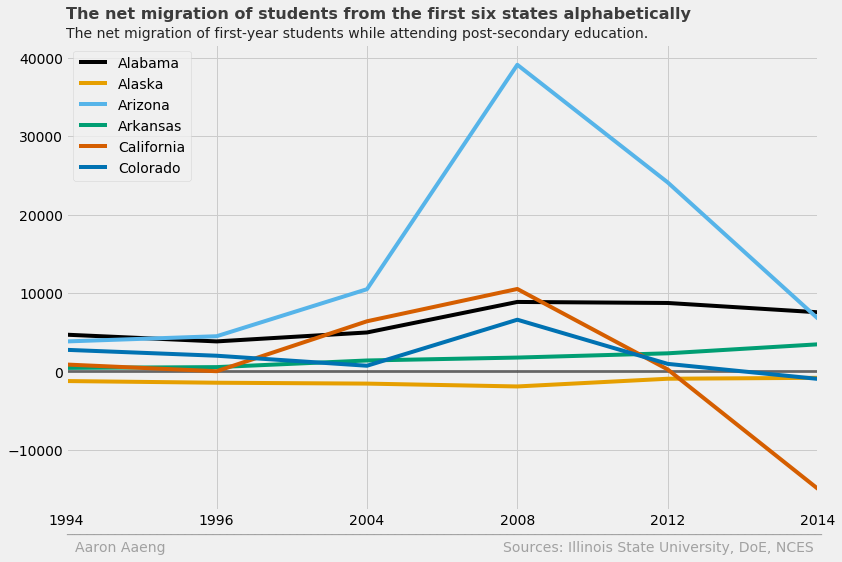

In [213]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

state_names = list(df_list[0].STATE.unique())

style.use('fivethirtyeight')

fig = plt.figure(1, figsize=(12,8))
ax1  = fig.add_subplot(111)

for i in range(int(len(state_names)/7)-1):
    ax1.plot(years, df_net[state_names[i]], color = colors[i % len(colors)], zorder=2)

ax1.plot(list(range(1994, 2015, 2)), [0]*11, color='black', alpha=.5, zorder=1, linewidth=3)

ax1.set_xlim(1994, 2014)
ax1.legend(loc='upper left')

ax1.text(x = 1994, y = -20500,
    s = '____________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

ax1.text(x = 1994, y = -23000,
    s = '  Aaron Aaeng                                                                           Sources: Illinois State University, DoE, NCES',
    fontsize = 14, color = 'grey', alpha = .7)

ax1.text(x = 1994, y = 45000, s = "The net migration of students from the first six states alphabetically",
               fontsize = 16, weight = 'bold', alpha = .75)
ax1.text(x = 1994, y = 42600, 
               s = 'The net migration of first-year students while attending post-secondary education.',
              fontsize = 14, alpha = .85)

In [133]:
df_net_change = copy.deepcopy(df_net)
for i in range(1, len(years)):
    for state in state_names:
        df_net_change.at[i, state] = df_net.at[i, state] - df_net.at[i-1, state]
        df_net_change.at[0, state] = 0

Text(1996,32000,'The difference in net migration of first-year students while attending post-secondary education from the\nprevious year.')

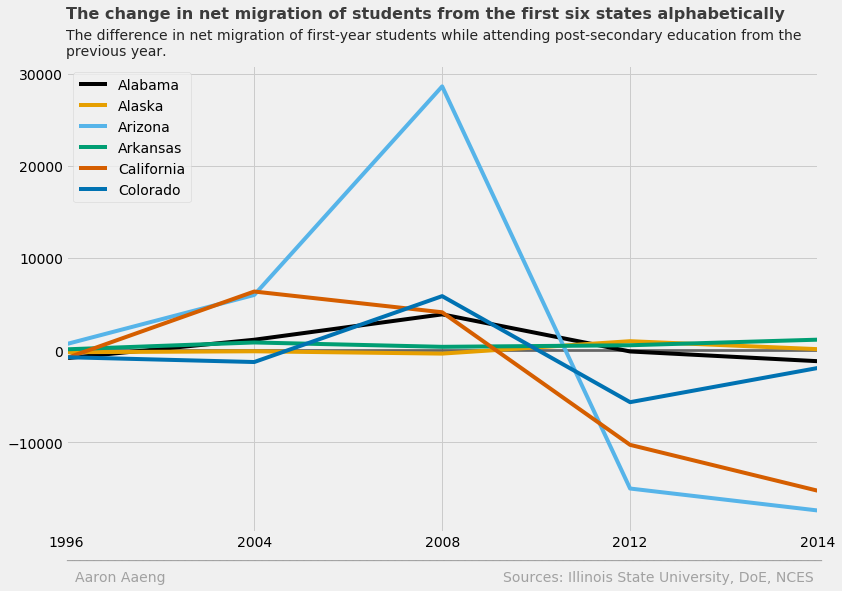

In [230]:
fig = plt.figure(1, figsize=(12,8))
ax1  = fig.add_subplot(111)

for i in range(int(len(state_names)/7)-1):
    ax1.plot(years, df_net_change[state_names[i]], color = colors[i % len(colors)], zorder=2)

ax1.plot(list(range(1994, 2015, 2)), [0]*11, color='black', alpha=.5, zorder=1, linewidth=3)

ax1.set_xlim(1996, 2014)
ax1.legend(loc='upper left')

ax1.text(x = 1996, y = -22500,
    s = '____________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

ax1.text(x = 1996, y = -25000,
    s = '  Aaron Aaeng                                                                           Sources: Illinois State University, DoE, NCES',
    fontsize = 14, color = 'grey', alpha = .7)

ax1.text(x = 1996, y = 40000-4000, s = "The change in net migration of students from the first six states alphabetically",
               fontsize = 16, weight = 'bold', alpha = .75)
ax1.text(x = 1996, y = 36000-4000, 
               s = 'The difference in net migration of first-year students while attending post-secondary education from the\nprevious year.',
              fontsize = 14, alpha = .85)

In [135]:
df_total_change = df_net_change.abs().sum()
top_change_states = list(df_total_change.nlargest(5).index)
top_change_states

['Arizona', 'California', 'Florida', 'Illinois', 'Texas']

Text(1996,32000,'These states have the greatest annual differences in net student migration.')

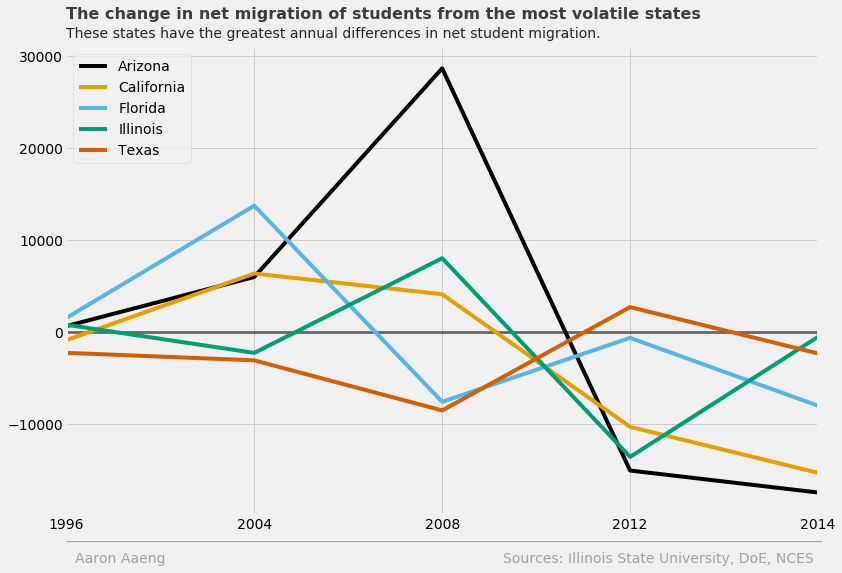

In [232]:
fig = plt.figure(1, figsize=(12,8))
ax1  = fig.add_subplot(111)

for i in range(len(top_change_states)):
    ax1.plot(years, df_net_change[top_change_states[i]], color = colors[i % len(colors)], zorder=2)

ax1.plot(list(range(1994, 2015, 2)), [0]*11, color='black', alpha=.5, zorder=1, linewidth=3)

ax1.set_xlim(1996, 2014)
ax1.legend(loc='upper left')

ax1.text(x = 1996, y = -22500,
    s = '____________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

ax1.text(x = 1996, y = -25000,
    s = '  Aaron Aaeng                                                                           Sources: Illinois State University, DoE, NCES',
    fontsize = 14, color = 'grey', alpha = .7)

ax1.text(x = 1996, y = 38000-4000, s = "The change in net migration of students from the most volatile states",
               fontsize = 16, weight = 'bold', alpha = .75)
ax1.text(x = 1996, y = 36000-4000, 
               s = 'These states have the greatest annual differences in net student migration.',
              fontsize = 14, alpha = .85)


In [183]:
def get_clean_funding_data(df):
    years = list(range(2008, 2015))
        
    state_names = list(df.STATE.unique())
    
    df_constant_sea = pd.DataFrame(index=years, columns=state_names)

    for year in years:
        for state in state_names:
            df_temp = df.loc[df["STATE"] == state]
            df_temp = df_temp.loc[df_temp["YEAR"] == year]
            df_constant_sea.at[year, state] = float(df_temp["CONSTANT_SEA"])
    return df_constant_sea

df_sea = get_clean_funding_data(df_funding)

Text(2008,1.46e+10,'The difference in state education appropriation - USD adjusted for inflation - from the previous year.')

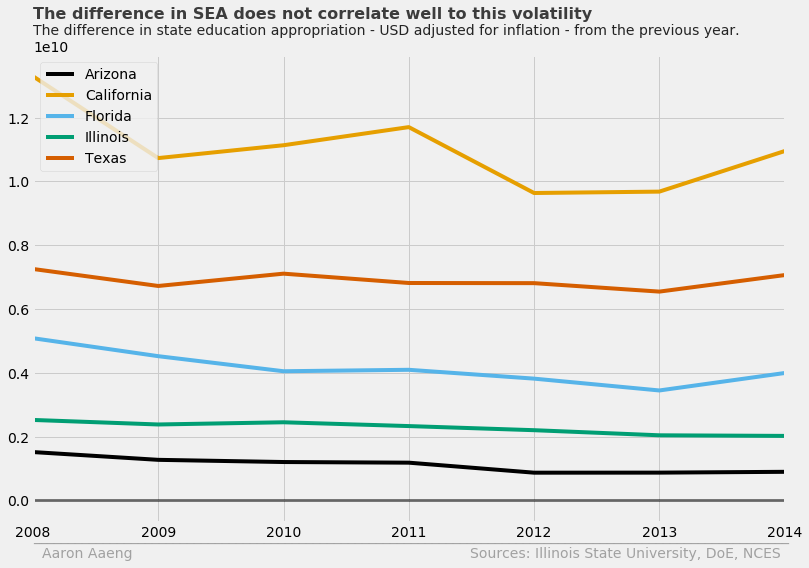

In [242]:
fig = plt.figure(1, figsize=(12,8))
ax1  = fig.add_subplot(111)

funding_years = list(range(2008, 2015))

for i in range(len(top_change_states)):
    ax1.plot(funding_years, df_sea[top_change_states[i]], color = colors[i % len(colors)], zorder=2)

ax1.plot(funding_years, [0]*7, color='black', alpha=.5, zorder=1, linewidth=3)

ax1.set_xlim(2008, 2014)
ax1.legend(loc='upper left')

ax1.text(x = 2008, y = -int(.13e10),
    s = '____________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

ax1.text(x = 2008, y = -int(.18e10),
    s = '  Aaron Aaeng                                                                           Sources: Illinois State University, DoE, NCES',
    fontsize = 14, color = 'grey', alpha = .7)

ax1.text(x = 2008, y = int(1.51e10), s = "The difference in SEA does not correlate well to this volatility",
               fontsize = 16, weight = 'bold', alpha = .75)
ax1.text(x = 2008, y = int(1.46e10), 
               s = 'The difference in state education appropriation - USD adjusted for inflation - from the previous year.',
              fontsize = 14, alpha = .85)